In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn import linear_model
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [140]:
%matplotlib inline
ecom = pd.read_excel("E Commerce Dataset.xlsx", sheet_name='E Comm')

In [141]:
# problem yang akan diselesaikan mengenai churn atau tidaknya suatu pelanggan, dan membedah apa saja faktor(feature) yang mempengaruhi churn dan tidaknya pelanggan

In [142]:
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [143]:
ecom.shape

(5630, 20)

In [144]:
ecom['Churn'].value_counts() ## perlu over sampling

0    4682
1     948
Name: Churn, dtype: int64

# Data Pre-Processing

# Handling Outlier

CustomerID


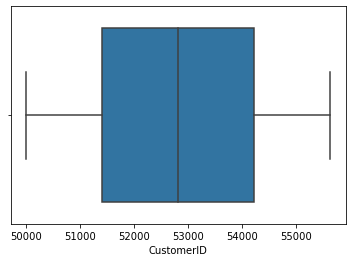

Churn


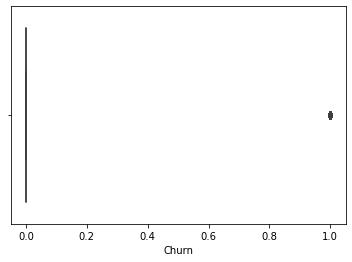

Tenure


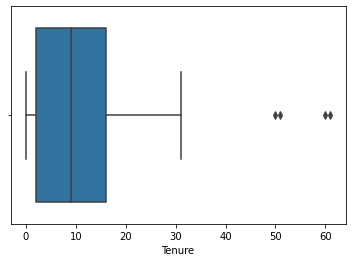

CityTier


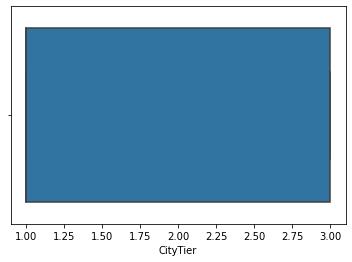

WarehouseToHome


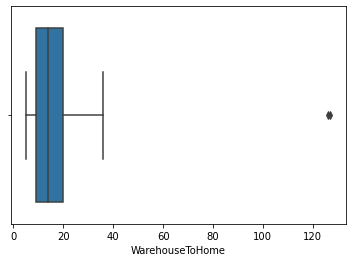

HourSpendOnApp


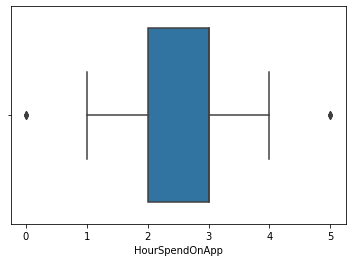

NumberOfDeviceRegistered


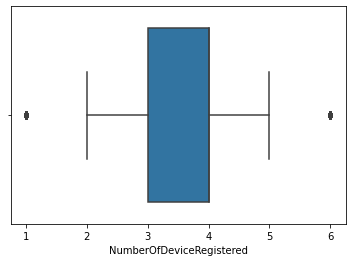

SatisfactionScore


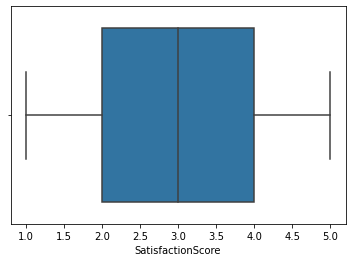

NumberOfAddress


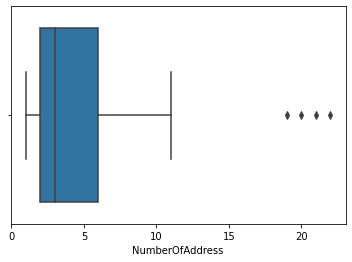

Complain


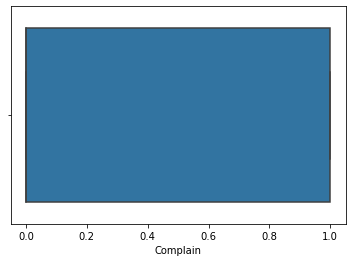

OrderAmountHikeFromlastYear


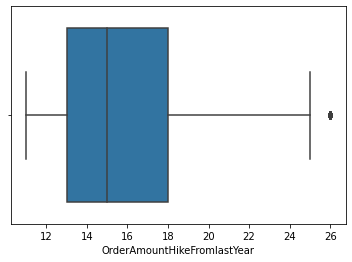

CouponUsed


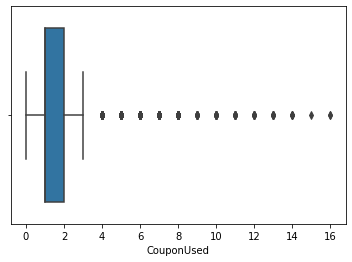

OrderCount


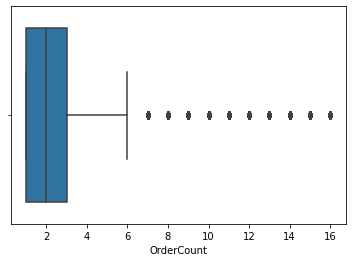

DaySinceLastOrder


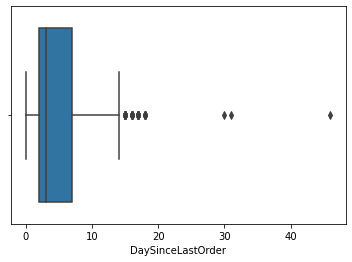

CashbackAmount


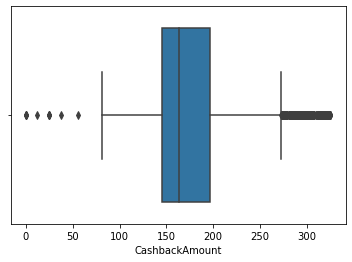

In [145]:
ob = 'object'
for col in ecom:
    result = ecom[col].dtype
    if result != ob:
        print(col)
        plt.figure()
        sns.boxplot(ecom[col])
        plt.show()

In [146]:
# Outlier Tenure
tenure_outlier = ecom.loc[(ecom.Tenure > 40)]
tenure_outlier

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.00
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,NaN,1.0,0.0,278.75
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.00
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75


In [147]:
# outlier WarehouseToHome
WarehouseToHome_outlier = ecom.loc[(ecom.WarehouseToHome > 40)]
WarehouseToHome_outlier

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


In [148]:
# outlier HourSpendOnApp
HourSpendOnApp_outlier = ecom.loc[(ecom.HourSpendOnApp>  4)]
HourSpendOnApp_outlier

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4223,54224,0,31.0,Mobile Phone,3,32.0,Debit Card,Female,5.0,4,Fashion,5,Single,9,0,12.0,7.0,8.0,10.0,201.37
4248,54249,0,4.0,Mobile Phone,1,9.0,Debit Card,Male,5.0,5,Laptop & Accessory,1,Married,3,0,20.0,4.0,11.0,9.0,166.52
4351,54352,0,1.0,Phone,1,16.0,Credit Card,Female,5.0,4,Mobile Phone,4,Single,3,0,17.0,1.0,2.0,4.0,147.79


In [149]:
# outlier NumberOfDeviceRegistered (sepertinya tidak perlu di drop)
NumberOfDeviceRegistered_outlier = ecom.loc[(ecom.NumberOfDeviceRegistered>  5)]
NumberOfDeviceRegistered_outlier

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2820,52821,1,1.0,Computer,1,23.0,Debit Card,Female,4.0,6,Mobile Phone,5,Single,3,1,23.0,5.0,7.0,8.0,164.19
2824,52825,1,1.0,Phone,1,32.0,Debit Card,Male,3.0,6,Mobile Phone,3,Single,3,0,13.0,2.0,2.0,2.0,147.93
2833,52834,1,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74
2835,52836,1,1.0,Mobile Phone,3,13.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Divorced,6,1,19.0,7.0,8.0,8.0,186.72
2838,52839,1,1.0,Mobile Phone,3,27.0,Debit Card,Female,4.0,6,Laptop & Accessory,3,Divorced,5,1,12.0,2.0,3.0,3.0,170.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,55550,0,5.0,Computer,1,8.0,Debit Card,Male,3.0,6,Laptop & Accessory,5,Married,3,0,22.0,7.0,9.0,8.0,175.03
5562,55563,0,5.0,Phone,1,9.0,Credit Card,Female,3.0,6,Mobile Phone,1,Married,3,1,12.0,1.0,2.0,1.0,136.29
5590,55591,0,12.0,Mobile Phone,1,17.0,Credit Card,Female,4.0,6,Fashion,3,Married,5,0,13.0,1.0,NaN,12.0,257.06
5607,55608,0,10.0,Computer,3,22.0,E wallet,Male,3.0,6,Laptop & Accessory,1,Married,3,0,25.0,6.0,12.0,12.0,179.06


In [150]:
# outlier NumberOfAddress (tidak paham maksud variabel ini)
NumberOfAddress_outlier = ecom.loc[(ecom.NumberOfAddress>  15)]
NumberOfAddress_outlier

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
260,50261,1,NaN,Computer,1,10.0,COD,Male,2.0,3,Mobile,2,Single,19,1,23.0,1.0,1.0,0.0,122.85
691,50692,0,12.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,21,0,15.0,1.0,1.0,3.0,167.82
3075,53076,1,1.0,Computer,1,11.0,COD,Male,3.0,4,Mobile Phone,2,Single,20,1,24.0,2.0,2.0,1.0,147.85
3506,53507,0,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Single,22,0,16.0,2.0,2.0,4.0,192.82


In [151]:
# outlier OrderAmountHikeFromlastYear (tidak paham maksud variabel ini sepertinya tidak perlu di drop)
OrderAmountHikeFromlastYear_outlier = ecom.loc[(ecom.OrderAmountHikeFromlastYear>  25)]
OrderAmountHikeFromlastYear_outlier.shape

(33, 20)

In [152]:
# outlier CouponUsed
CouponUsed_outlier = ecom.loc[(ecom.CouponUsed>  4)]
CouponUsed_outlier

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,50011,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,NaN,9.0,15.0,8.0,295.45
20,50021,1,0.0,Mobile Phone,3,12.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Divorced,5,1,18.0,6.0,7.0,7.0,161.72
21,50022,1,20.0,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,2,Divorced,2,0,12.0,11.0,15.0,6.0,203.12
85,50086,1,0.0,Mobile Phone,3,10.0,Credit Card,Male,2.0,5,Fashion,2,Divorced,2,0,11.0,7.0,9.0,8.0,204.00
93,50094,0,18.0,Computer,3,12.0,Credit Card,Female,2.0,4,Fashion,2,Single,7,0,12.0,12.0,12.0,8.0,188.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,55570,0,14.0,Computer,1,18.0,COD,Female,4.0,4,Laptop & Accessory,3,Married,3,0,12.0,8.0,10.0,5.0,188.23
5574,55575,0,21.0,Mobile Phone,1,32.0,Credit Card,Male,3.0,4,Fashion,3,Single,4,0,24.0,10.0,13.0,NaN,211.33
5585,55586,0,7.0,Mobile Phone,1,22.0,Credit Card,Female,4.0,4,Laptop & Accessory,1,Married,2,1,14.0,7.0,9.0,2.0,173.78
5604,55605,1,20.0,Phone,1,14.0,COD,Male,4.0,4,Mobile Phone,3,Married,10,0,12.0,7.0,10.0,9.0,148.39


In [153]:
# outlier DaySinceLastOrder 
DaySinceLastOrder_outlier = ecom.loc[(ecom.DaySinceLastOrder>  15)]
DaySinceLastOrder_outlier.shape

(43, 20)

In [154]:
# CashbackAmount outlier sepertinya tidak di drop
CashbackAmount_outlier = ecom.loc[(ecom.CashbackAmount>  290)]
CashbackAmount_outlier.shape

(319, 20)

In [155]:
# drop outlier
ecom = ecom.drop(ecom[ecom.Tenure > 40].index)
ecom = ecom.drop(ecom[ecom.WarehouseToHome > 40 ].index)
ecom = ecom.drop(ecom[ecom.HourSpendOnApp > 4 ].index)
ecom = ecom.drop(ecom[ecom.HourSpendOnApp > 15 ].index)
ecom = ecom.drop(ecom[ecom.OrderAmountHikeFromlastYear > 25 ].index)

In [156]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5588 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5588 non-null   int64  
 1   Churn                        5588 non-null   int64  
 2   Tenure                       5324 non-null   float64
 3   PreferredLoginDevice         5588 non-null   object 
 4   CityTier                     5588 non-null   int64  
 5   WarehouseToHome              5337 non-null   float64
 6   PreferredPaymentMode         5588 non-null   object 
 7   Gender                       5588 non-null   object 
 8   HourSpendOnApp               5333 non-null   float64
 9   NumberOfDeviceRegistered     5588 non-null   int64  
 10  PreferedOrderCat             5588 non-null   object 
 11  SatisfactionScore            5588 non-null   int64  
 12  MaritalStatus                5588 non-null   object 
 13  NumberOfAddress   

# Handling missing value

In [157]:
ecom.isnull().sum() # 10% dari 5630 = 563, null value kurang dari 563 tidak perlu remove, bisa mengunakan fillna

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    264
CouponUsed                     251
OrderCount                     254
DaySinceLastOrder              305
CashbackAmount                   0
dtype: int64

In [158]:
ecom.info() # 10% dari 5630 = 563, null value kurang dari 563

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5588 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5588 non-null   int64  
 1   Churn                        5588 non-null   int64  
 2   Tenure                       5324 non-null   float64
 3   PreferredLoginDevice         5588 non-null   object 
 4   CityTier                     5588 non-null   int64  
 5   WarehouseToHome              5337 non-null   float64
 6   PreferredPaymentMode         5588 non-null   object 
 7   Gender                       5588 non-null   object 
 8   HourSpendOnApp               5333 non-null   float64
 9   NumberOfDeviceRegistered     5588 non-null   int64  
 10  PreferedOrderCat             5588 non-null   object 
 11  SatisfactionScore            5588 non-null   int64  
 12  MaritalStatus                5588 non-null   object 
 13  NumberOfAddress   

Tenure
Skew 0.6553523188066764


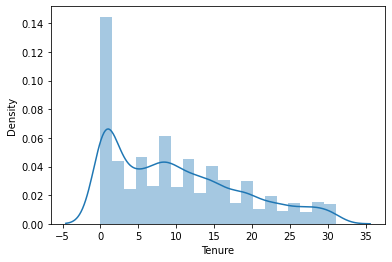

WarehouseToHome
Skew 0.9006640145861954


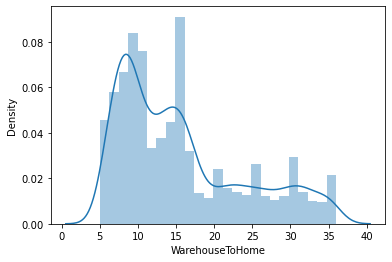

HourSpendOnApp
Skew -0.030633188605323183


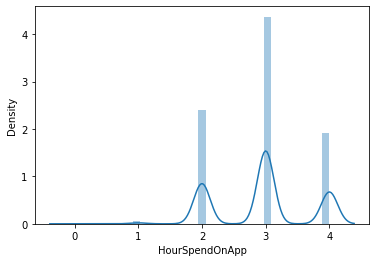

OrderAmountHikeFromlastYear
Skew 0.7570613457172986


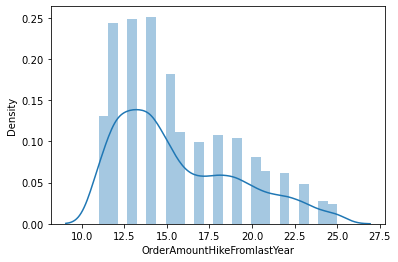

CouponUsed
Skew 2.557241227481091


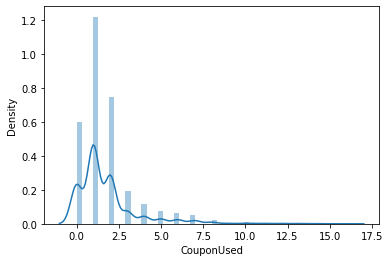

OrderCount
Skew 2.2007516214577043


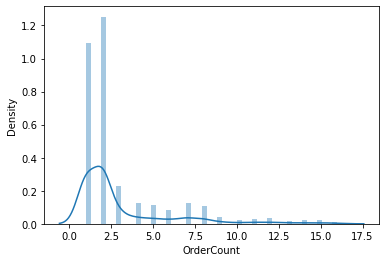

DaySinceLastOrder
Skew 1.1944631426048269


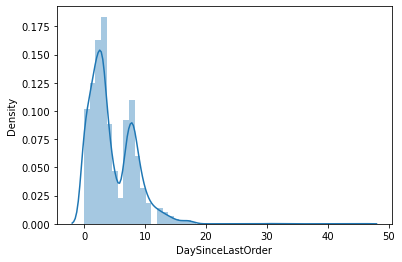

In [159]:
for col in ecom:
    if ecom[col].isnull().sum() > 0:
        print(col)
        skewvalue = ecom[col].skew(axis=0, skipna=True)
        print('Skew',skewvalue)
        plt.figure()
        sns.distplot(ecom[col])
        plt.show()

In [160]:
for col in ecom:
    result = ecom[col].dtype
    if result != ob:
        skewvalue = ecom[col].skew(axis=0, skipna=True)
        if skewvalue <= 0.9 and skewvalue >= -0.9:
            ecom[col].fillna(value=ecom[col].mean(), inplace=True)
        else:
            ecom[col].fillna(value=ecom[col].median(), inplace=True)

In [163]:
ecom.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# Handling Dupicate Data

In [211]:
cek_duplicated = ecom[ecom.duplicated()]
cek_duplicated # no duplicated data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


# Encoding

In [164]:
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,10.145755,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,10.145755,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.928371,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [165]:
ecom['PreferredLoginDevice'].value_counts() #onehotencoding

Mobile Phone    2738
Computer        1623
Phone           1227
Name: PreferredLoginDevice, dtype: int64

In [166]:
ecom['PreferredPaymentMode'].value_counts() #Label Encoding or target encoding

Debit Card          2293
Credit Card         1488
E wallet             612
UPI                  412
COD                  363
CC                   273
Cash on Delivery     147
Name: PreferredPaymentMode, dtype: int64

In [168]:
ecom['PreferedOrderCat'].value_counts() #Label Encoding or target encoding

Laptop & Accessory    2035
Mobile Phone          1260
Fashion                815
Mobile                 808
Grocery                406
Others                 264
Name: PreferedOrderCat, dtype: int64

In [170]:
ecom['Gender'].value_counts() #onehotencoding

Male      3362
Female    2226
Name: Gender, dtype: int64

In [169]:
ecom['MaritalStatus'].value_counts() #onehotencoding

Married     2961
Single      1784
Divorced     843
Name: MaritalStatus, dtype: int64

In [171]:
# Onehotencoding
ecom_encode = pd.get_dummies(ecom, columns = ['PreferredLoginDevice', 'Gender','MaritalStatus'])

In [175]:
# Label encoder
label_encoder = preprocessing.LabelEncoder()
cat = ['PreferredPaymentMode', 'PreferedOrderCat']
ecom_encode[cat] = ecom_encode[cat].apply(label_encoder.fit_transform)

In [177]:
ecom_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5588 entries, 0 to 5629
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         5588 non-null   int64  
 1   Churn                              5588 non-null   int64  
 2   Tenure                             5588 non-null   float64
 3   CityTier                           5588 non-null   int64  
 4   WarehouseToHome                    5588 non-null   float64
 5   PreferredPaymentMode               5588 non-null   int32  
 6   HourSpendOnApp                     5588 non-null   float64
 7   NumberOfDeviceRegistered           5588 non-null   int64  
 8   PreferedOrderCat                   5588 non-null   int32  
 9   SatisfactionScore                  5588 non-null   int64  
 10  NumberOfAddress                    5588 non-null   int64  
 11  Complain                           5588 non-null   int64

# mencari korelasi

<AxesSubplot:>

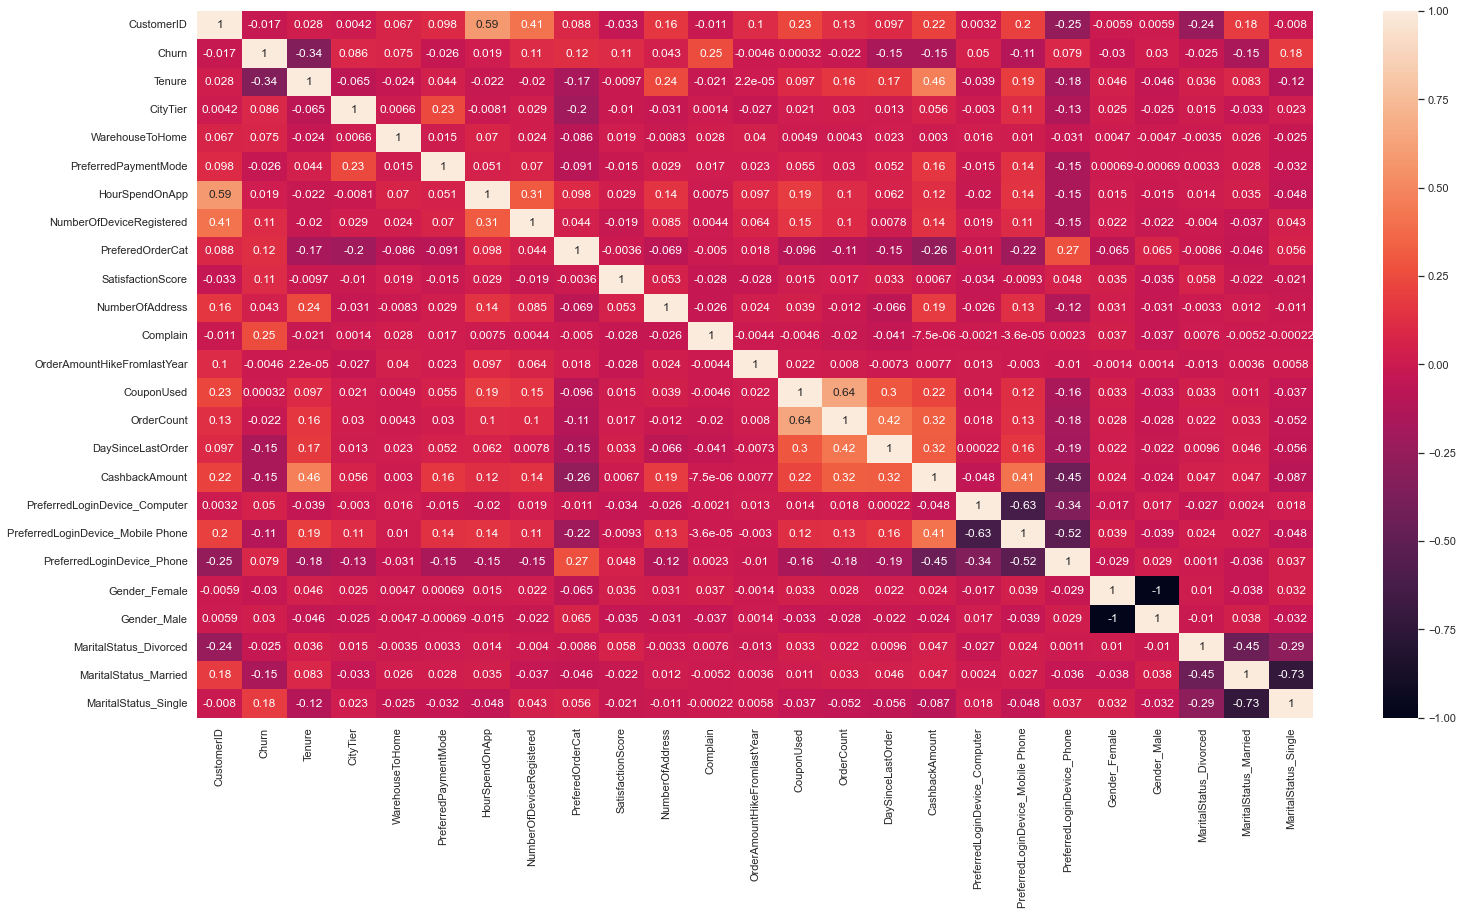

In [181]:
sns.set(rc = {'figure.figsize':(25,13)})
sns.heatmap(ecom_encode.corr(), annot=True)

In [183]:
ecom_encode.var()

CustomerID                           2.640489e+06
Churn                                1.406570e-01
Tenure                               6.834739e+01
CityTier                             8.378006e-01
WarehouseToHome                      6.525946e+01
PreferredPaymentMode                 1.938114e+00
HourSpendOnApp                       4.955499e-01
NumberOfDeviceRegistered             1.049862e+00
PreferedOrderCat                     1.989044e+00
SatisfactionScore                    1.899234e+00
NumberOfAddress                      6.705992e+00
Complain                             2.037668e-01
OrderAmountHikeFromlastYear          1.230483e+01
CouponUsed                           3.421935e+00
OrderCount                           8.200657e+00
DaySinceLastOrder                    1.268634e+01
CashbackAmount                       2.422083e+03
PreferredLoginDevice_Computer        2.061231e-01
PreferredLoginDevice_Mobile Phone    2.499443e-01
PreferredLoginDevice_Phone           1.713940e-01


<AxesSubplot:>

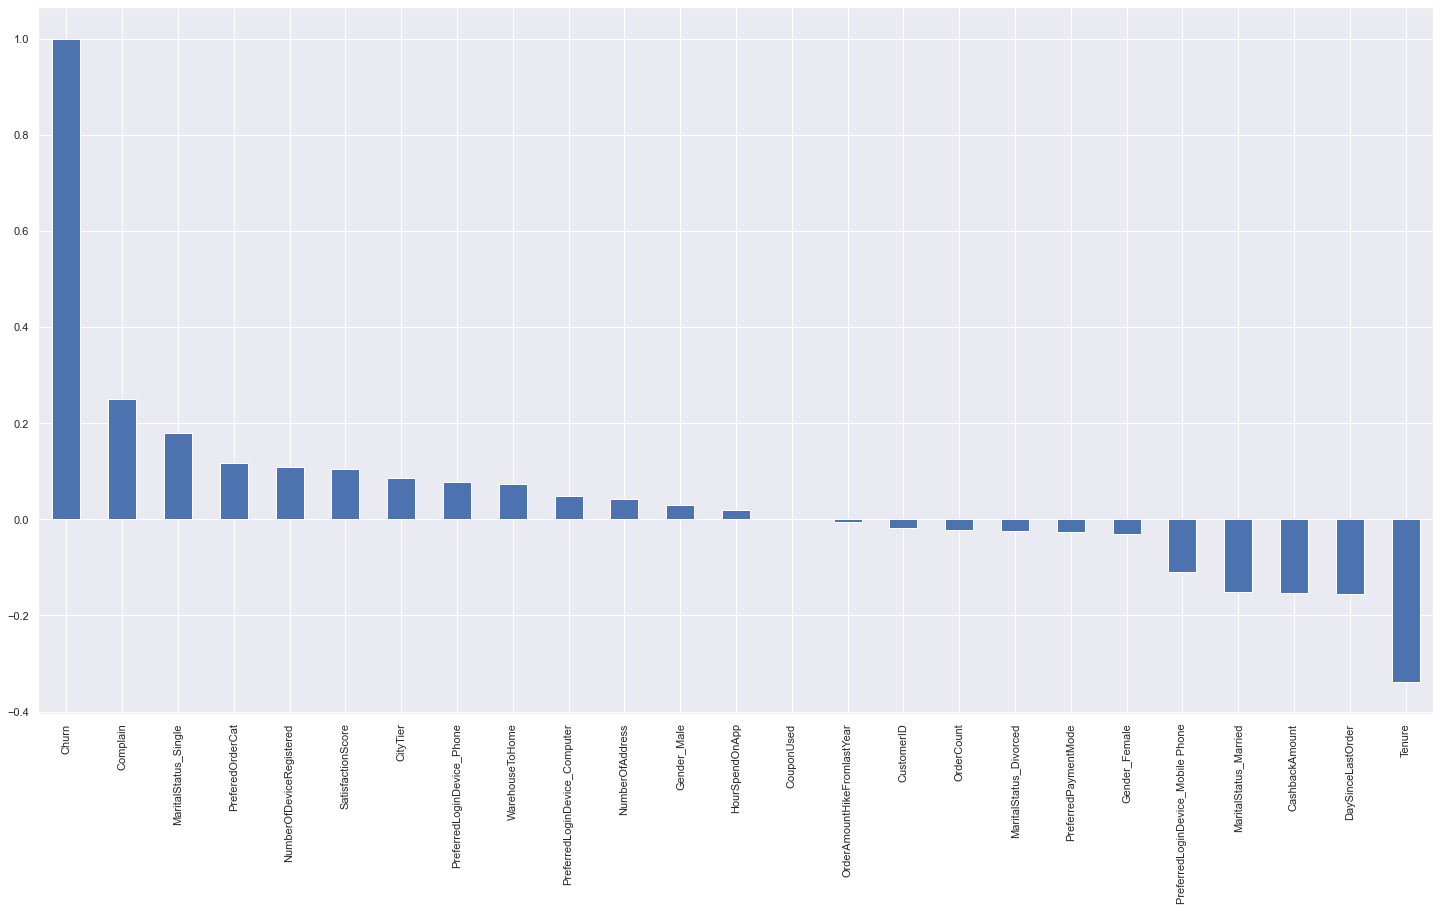

In [185]:
plt.figure(figsize=(25,13))
ecom_encode.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') 

<AxesSubplot:>

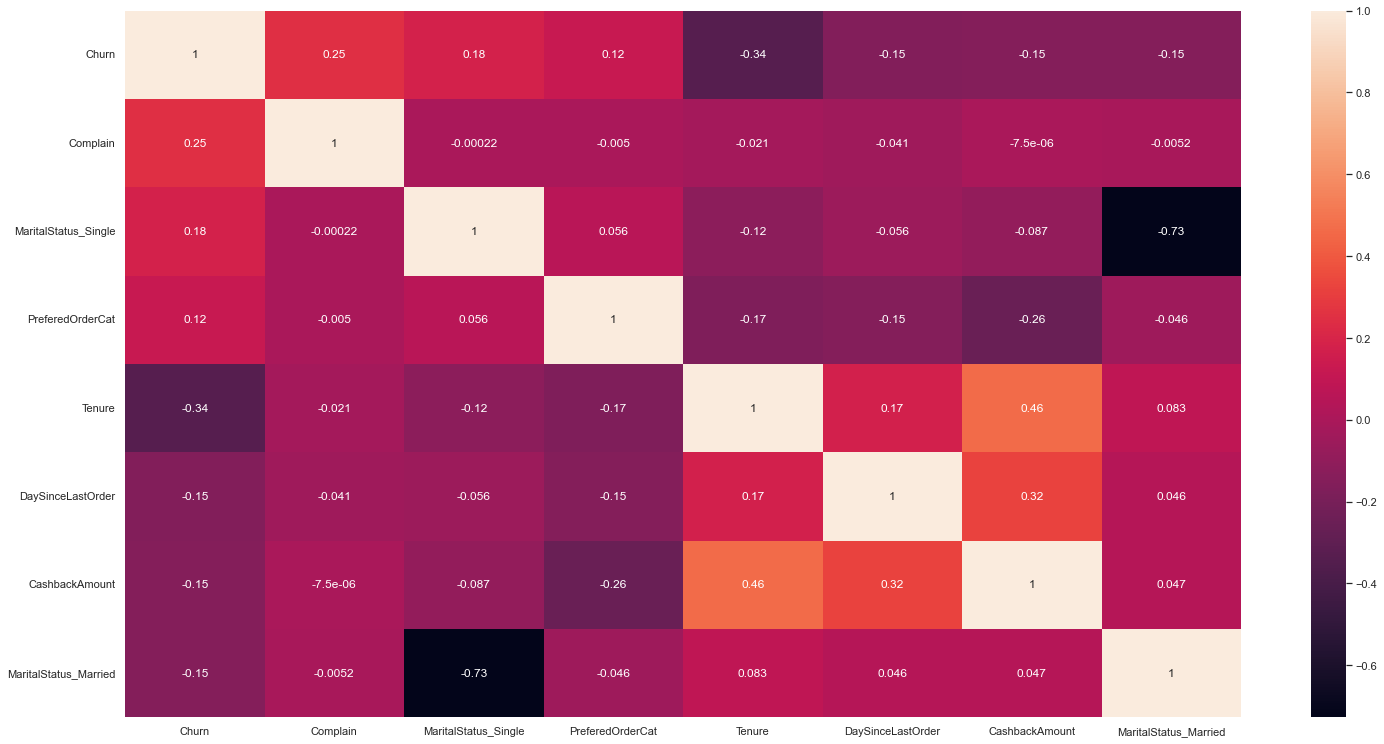

In [187]:
sns.set(rc = {'figure.figsize':(25,13)})
sns.heatmap(ecom_encode[['Churn','Complain','MaritalStatus_Single','PreferedOrderCat','Tenure','DaySinceLastOrder','CashbackAmount','MaritalStatus_Married']].corr(), annot=True)

In [193]:
ecom_encode['Churn'].value_counts() #imbalance

0    4642
1     946
Name: Churn, dtype: int64

# Split X (train) dan Y(test)

In [189]:
x = ecom_encode[['Complain','MaritalStatus_Single','PreferedOrderCat','Tenure','DaySinceLastOrder','CashbackAmount','MaritalStatus_Married']]
y = ecom_encode['Churn']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=90)

In [196]:
from imblearn.over_sampling import SMOTE

In [198]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [200]:
X_train_res.shape

(7438, 7)

In [202]:
y_train_res.shape

(7438,)

In [210]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res.ravel())
predictions = lr.predict(X_test)

print(accuracy_score(y_test,predictions))

0.7549194991055456


In [212]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(n_estimators=2000 , oob_score = True, n_jobs = -1,
                                  random_state =75, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train_res, y_train_res)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       923
           1       0.50      0.81      0.62       195

    accuracy                           0.83      1118
   macro avg       0.73      0.82      0.75      1118
weighted avg       0.88      0.83      0.84      1118

